First few rows of the dataset:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


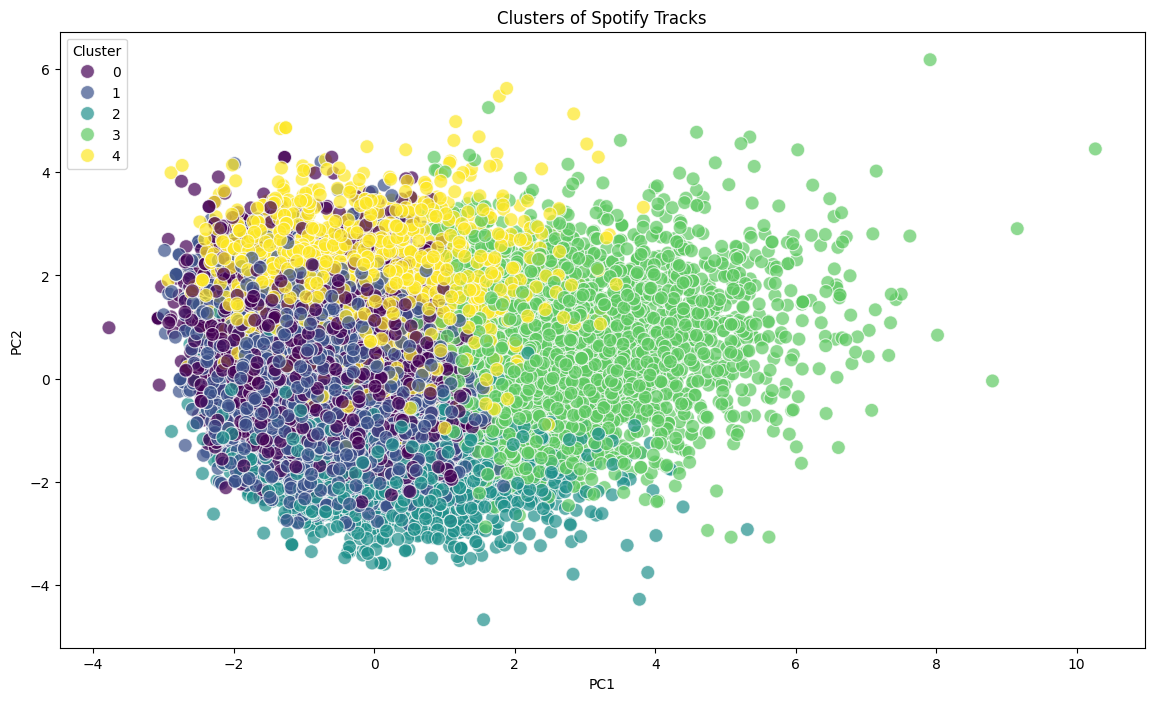

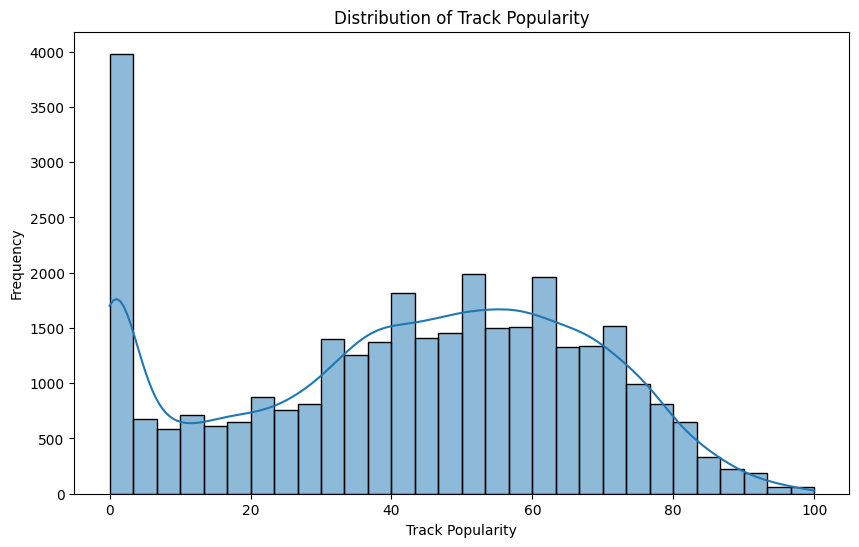

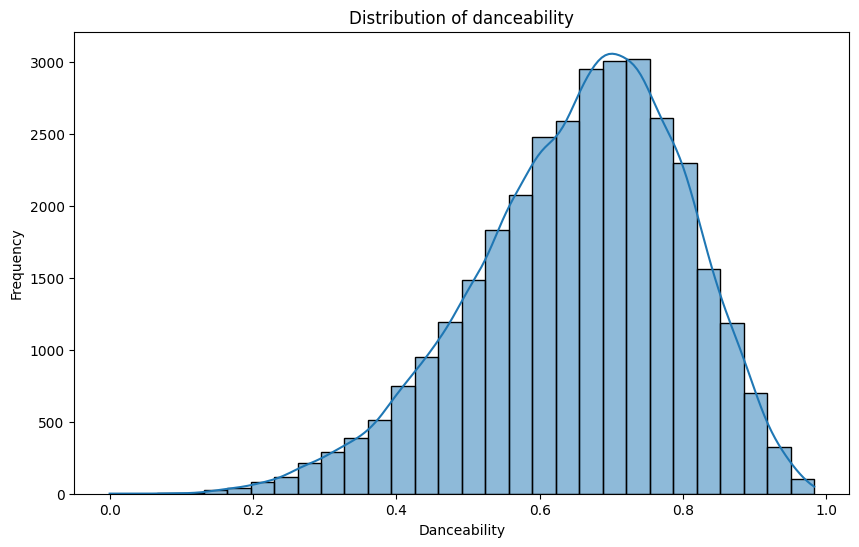

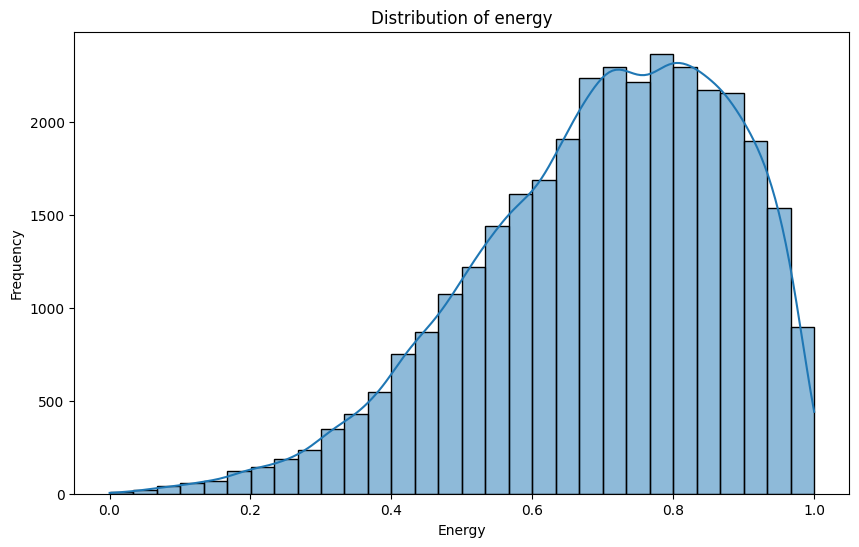

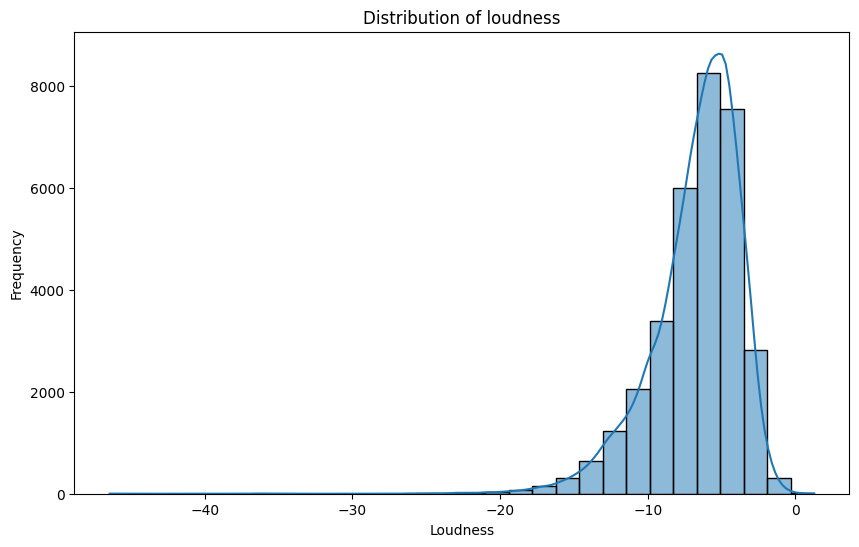

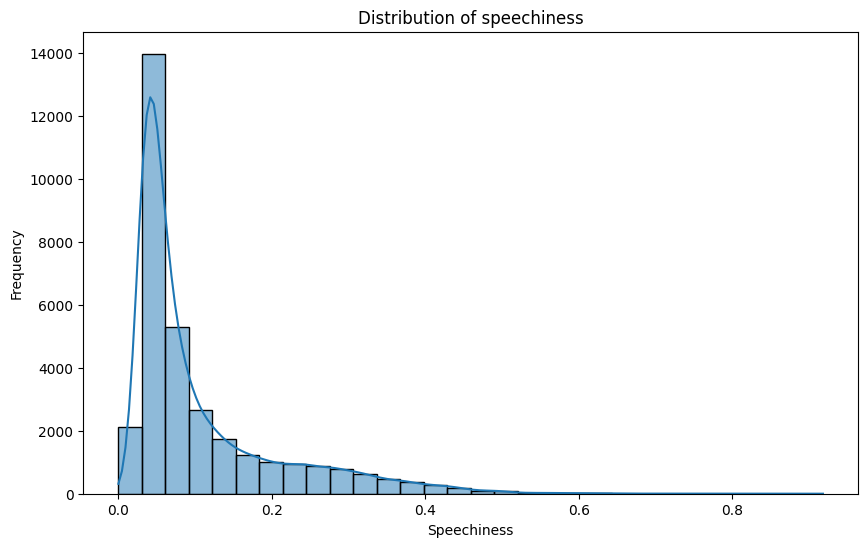

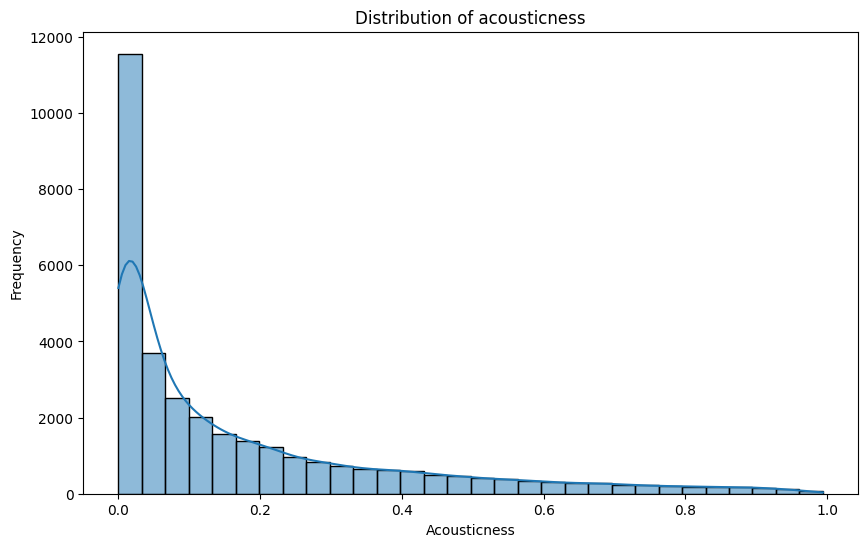

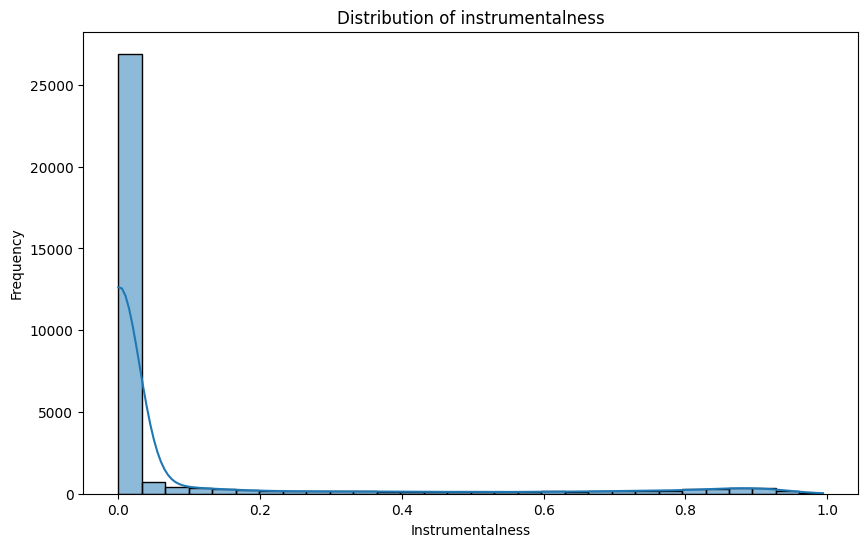

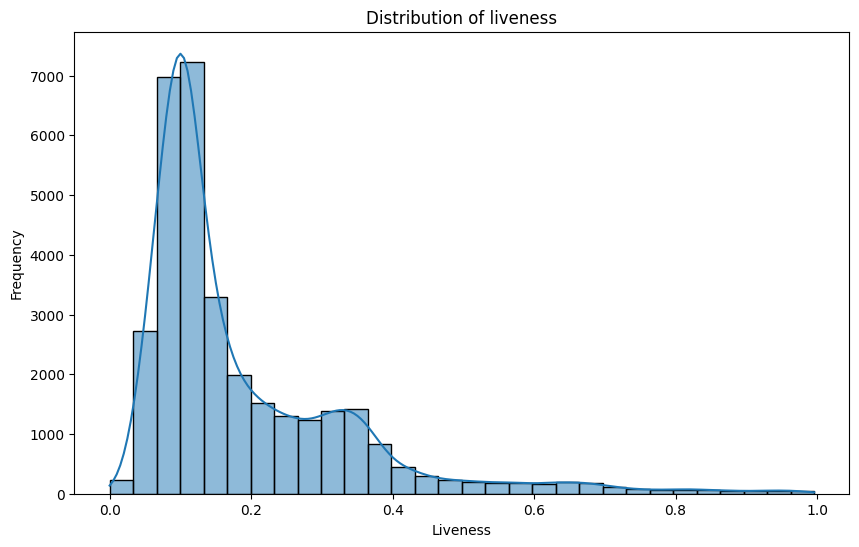

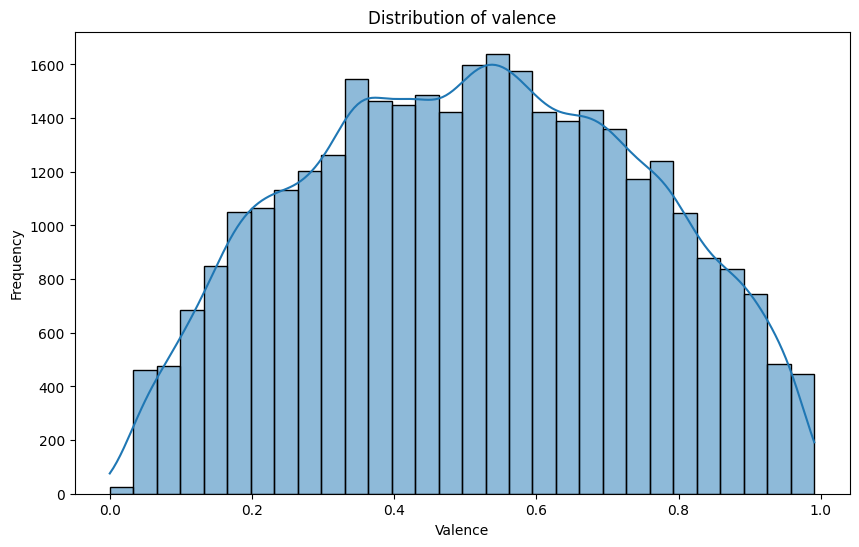

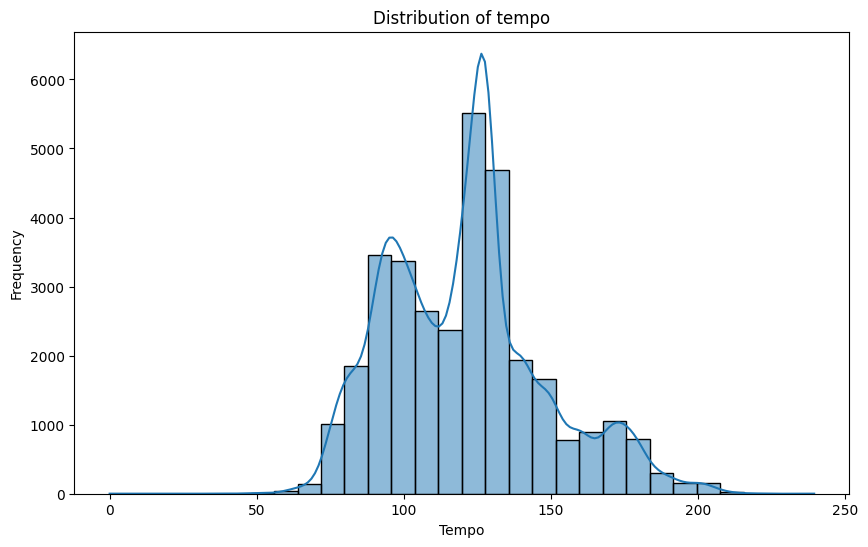

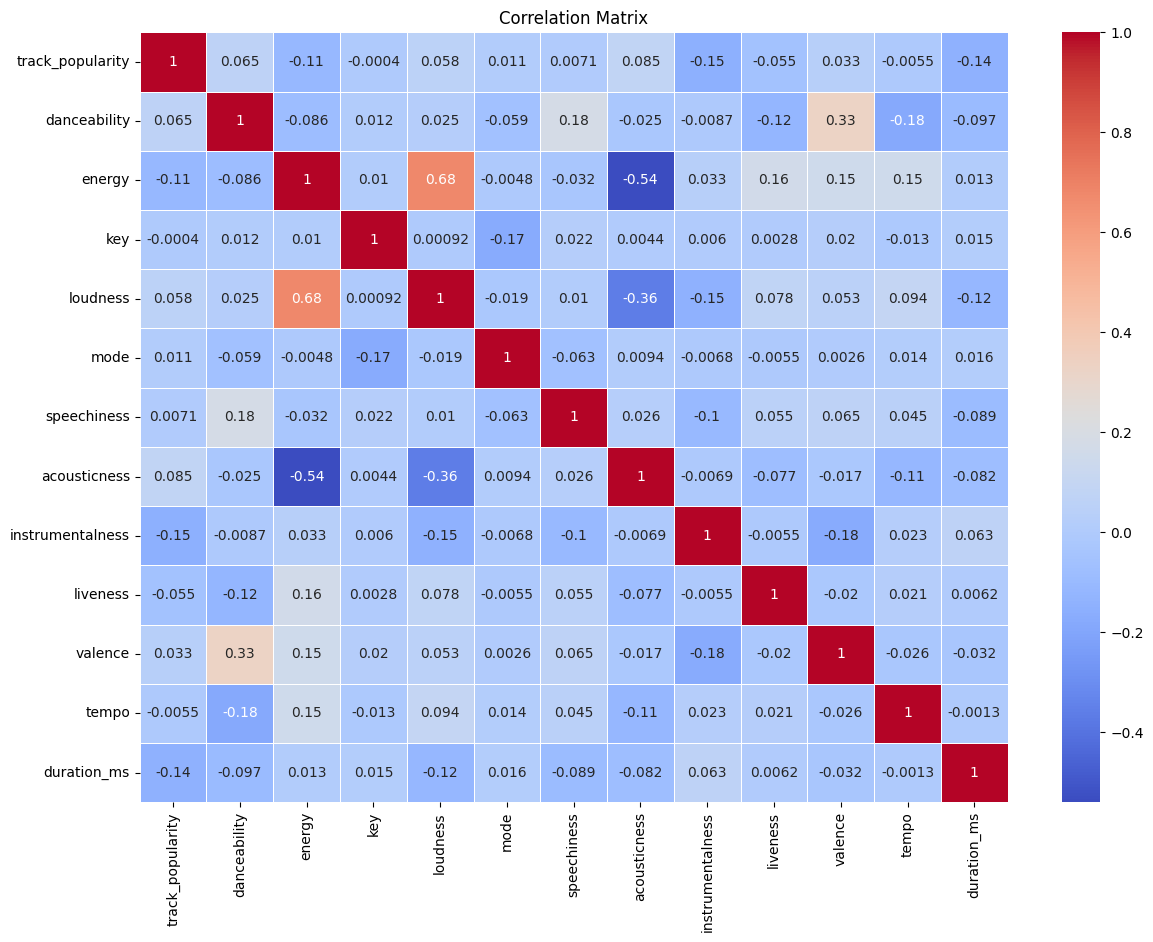

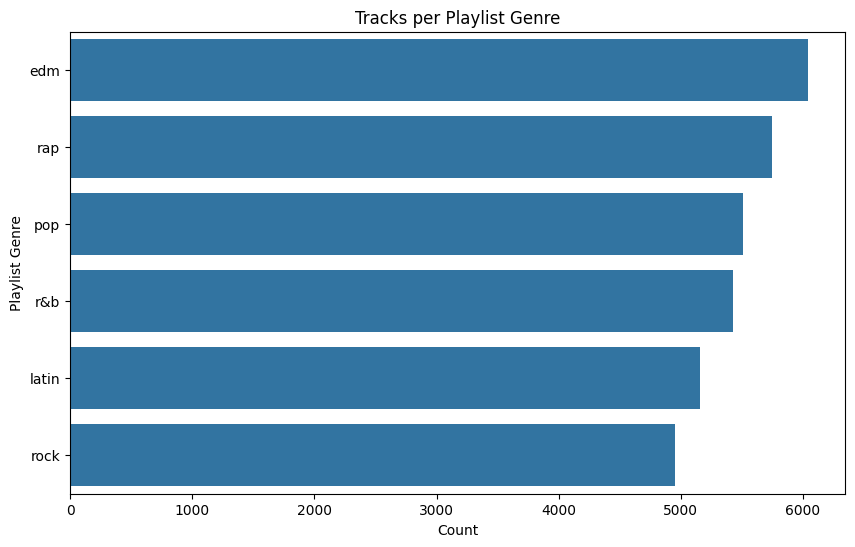

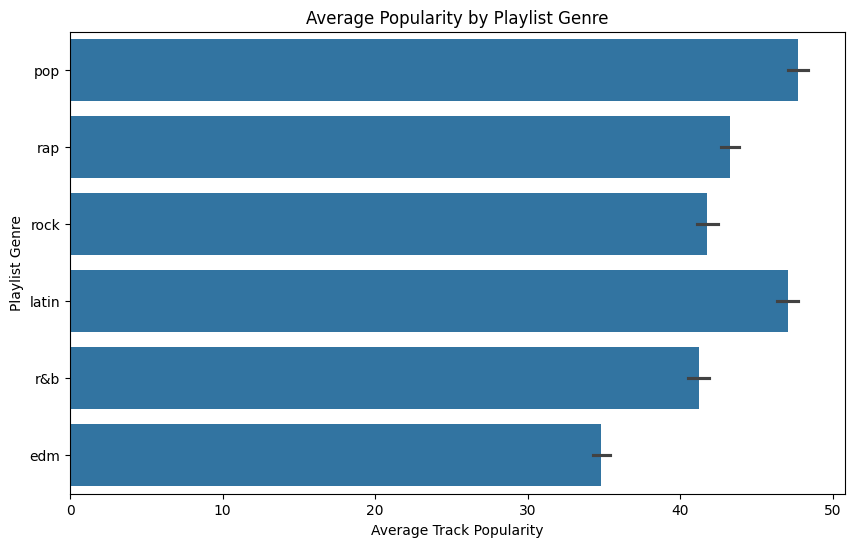

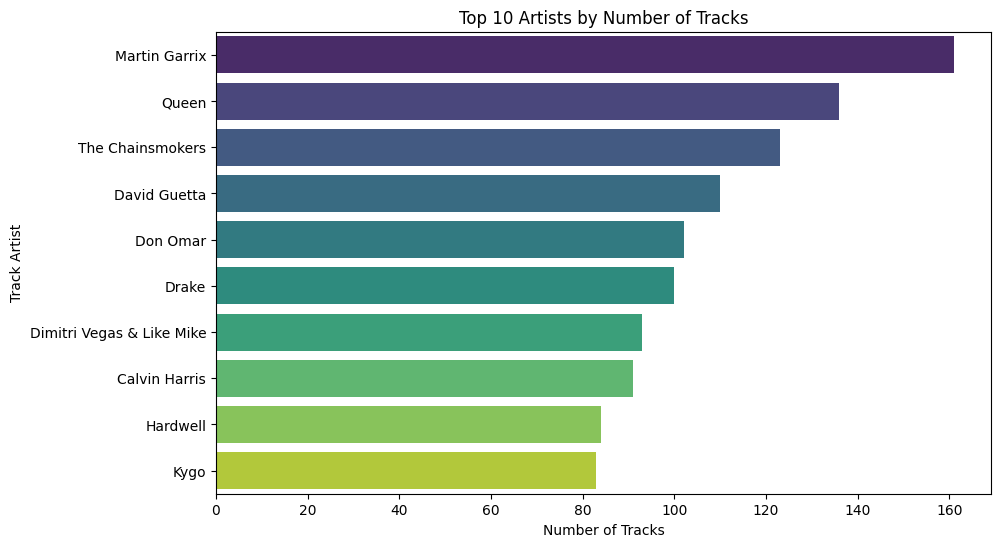

Recommended Tracks Based on Example Track:
                                              track_name track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran   
27857                                               Real       Notion   
950                                                  G+O        WHYLO   
458                                           KILLING ME         iKON   
2282                                          Surf Crazy  Spencer Lee   
1013               Sounds Good To Me - Gerd Janson Remix  Hanne Mjøen   
21882                                       Nite and Day  Al B. Sure!   
28973                                     Still Swingin'   Papa Roach   
230          Don’t Give Up On Me Now (with Julie Bergan)        R3HAB   
1352                                     Nice To Meet Ya  Niall Horan   

       track_popularity  
0                    66  
27857                 0  
950                  29  
458                  63  
2282                 51

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Define the file path
file_path = 'spotifydataset.csv'

# Check if the file exists at the specified path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file at path {file_path} does not exist.")

# Load the dataset
spotify_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(spotify_data.head())

# Check for missing values in the dataset
missing_values = spotify_data.isnull().sum()

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Remove rows with missing values
spotify_data_cleaned = spotify_data.dropna()

# Verify the removal by checking for missing values again
missing_values_cleaned = spotify_data_cleaned.isnull().sum()
print("Columns with missing values after cleaning:")
print(missing_values_cleaned[missing_values_cleaned > 0])

# Display data types of the columns
data_types = spotify_data_cleaned.dtypes
print("Data types of the columns:")
print(data_types)

# Display unique values for categorical features
categorical_features = spotify_data_cleaned.select_dtypes(include=['object']).nunique()
print("Unique values for categorical features:")
print(categorical_features)

# Print column names
print("Column names:")
print(spotify_data_cleaned.columns)

# Feature Engineering
# Convert categorical features to numerical using one-hot encoding
spotify_data_encoded = pd.get_dummies(
    spotify_data_cleaned,
    columns=['playlist_genre', 'track_artist', 'playlist_name']
)

# Convert track_album_release_date to datetime
# Handle mixed formats or inconsistent date formats
spotify_data_encoded['track_album_release_date'] = pd.to_datetime(
    spotify_data_encoded['track_album_release_date'],
    format='%d-%m-%Y',  # Adjust the format if needed
    errors='coerce',
    dayfirst=True
)

# Drop rows with NaN values in 'track_album_release_date'
spotify_data_encoded = spotify_data_encoded.dropna(subset=['track_album_release_date'])

# Verify the removal of NaN values
print("Columns with missing values after additional cleaning:")
print(spotify_data_encoded.isnull().sum()[spotify_data_encoded.isnull().sum() > 0])

# Standardize numerical features for clustering
scaler = StandardScaler()
numerical_features = spotify_data_encoded.select_dtypes(include=['float64', 'int64']).drop(columns=['track_popularity'])
scaled_features = scaler.fit_transform(numerical_features)

scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# PCA to reduce dimensions for better visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# KMeans Clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(scaled_features_df)
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Spotify Tracks')
plt.show()

# Distribution of Track Popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data_cleaned['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

# Distribution of Audio Features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for feature in audio_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(spotify_data_cleaned[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = spotify_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Tracks per Playlist Genre
plt.figure(figsize=(10, 6))
sns.countplot(y='playlist_genre', data=spotify_data_cleaned, order=spotify_data_cleaned['playlist_genre'].value_counts().index)
plt.title('Tracks per Playlist Genre')
plt.xlabel('Count')
plt.ylabel('Playlist Genre')
plt.show()

# Average Popularity by Playlist Genre
plt.figure(figsize=(10, 6))
sns.barplot(x='track_popularity', y='playlist_genre', data=spotify_data_cleaned, estimator=lambda x: sum(x) / len(x))
plt.title('Average Popularity by Playlist Genre')
plt.xlabel('Average Track Popularity')
plt.ylabel('Playlist Genre')
plt.show()

# Top Artists by Number of Tracks
top_artists = spotify_data_cleaned['track_artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis', hue=top_artists.index, dodge=False)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Track Artist')
plt.legend([], [], frameon=False)
plt.show()

# Model Building - Example: KNN for Recommendation
# Assuming 'track_popularity' is the target feature for recommendation
features_for_model = scaled_features_df
target_feature = spotify_data_encoded['track_popularity']

knn = NearestNeighbors(n_neighbors=10)
knn.fit(features_for_model)

# Example: Recommending tracks similar to the first track in the dataset
example_track = features_for_model.iloc[0:1]  # Keep the DataFrame format with feature names
distances, indices = knn.kneighbors(example_track)

# Show recommended tracks (track_name instead of track_id)
recommended_tracks = spotify_data_cleaned.iloc[indices[0]][['track_name', 'track_artist', 'track_popularity']]
print("Recommended Tracks Based on Example Track:")
print(recommended_tracks)
